# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [1]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "heart" 
icon_path = "%s.png" % icon

### 데이터 입력

In [3]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("78th school anniversary.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

  오늘 우리 한양대학교의 개교 78주년을 맞아, 우리대학을 찾아주신 내외 귀빈 여러분과 그리고 이 자리가 있기까지 오랜 헌신의 시간을 쌓아 오신 한양 가족 여러분께, 더없이 깊은 감사의 인사를 드립니다. 오래 전 한양학원 설립자 백남 김연준 선생님께서 이 땅에 사랑의 씨앗을 뿌리신 지 어언 78년의 세월이 흘렀습니다. 이제 그 씨앗은 이렇게 아름답고 커다란 나무들이 모인 숲으로 자라, 크나큰 사랑을 실천해가는 배움의 요람으로 성장하였습니다. 큰 감동과 함께, 보다 더 큰 책임이 뒤따르는 순간이 아닐 수 없습니다.
   
  존경하는 한양 가족 여러분!
   
  우리 한양대학교는 ‘사랑의 실천’을 건학이념으로 하여 1939년 동아공과학원으로 그 역사를 시작하였습니다. 무엇보다 ‘사랑’의 가치를 가르치는 우리 한양의 교육에는 다른 어느 대학도 갖추지 못한 품격이 있습니다. 우리 한양은 그동안 ‘사랑의 실천’ 정신과 우리 사회에 힘이 되는 인재를 양성한다는 실용학풍에 따라 수없이 많은 인재를 배출해왔습니다. 그만큼 우리 한양은 창의력과 실용적 전문 능력을 더하는 교육을 지향해왔고 앞으로도 그리할 것입니다. 창의력은 세상을 바꾸는 힘이고 실용 전문 능력은 세상을 발전시키는 힘입니다. 그 결과 한양은 ‘대한민국의 성장동력’이라는 명성을 얻었습니다. 이처럼 우리 한양의 자부심이기도 한 ‘사랑의 실천’과 실용학풍이야말로 한양을 더욱 한양답게 만드는 핵심가치이자 궁극적 지표입니다. 앞으로도 우리는 ‘사랑의 실천’과 한양인의 창의를 기초로, 대학과 사회 발전의 원동력을 마련하고, 이를 가깝게는 우리 이웃, 나아가 세상과 나눔으로써 우리에게 주어진 막중한 사회적 책임을 다하고자 합니다.
   
  우리 한양대학교는 서울과 ERICA캠퍼스 25개 단과대학에, 학부생 2만 5천여 명, 대학원생 1만여 명하여 총 3만 5천여 명이 수학하고 있는 큰 공동체입니다. 또한 훌륭한 31여만 동문을 배출하여 국가 발전에 기여하고 있습니다. 얼마 전 자체 분석한 바에 의하면 한양 출신 동문

In [4]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("2017NewYear'saddress.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

존경하는 한양가족 여러분!

   정유년 새해가 밝았습니다. 한양가족 모두에게 희망과 행복이 가득하시길 바랍니다. 아울러 한양가족 여러분의 가정에도 새 햇살이 가득 넘쳐, 보다 건강하고 행복한 한 해를 누리시길 마음 깊이 기원합니다.
   지난 한 해, 우리 한양은 참으로 숨 가쁘게 달려왔습니다. 국내외적으로 다사다난했던 시간이었지만, 우리는 창의적 도전을 통해 한양의 제 모습을 찾으려 노력했습니다. 그 과정에서 우리는 많은 역경도 맛보았고, 예년과는 다른 커다란 성과도 거두었습니다. 지난 한 해, 힘겨웠던 시간을 함께 해주신 한양가족 여러분께 깊은 감사의 인사를 드립니다.
   이제 우리는 새해를 맞이하며 새로운 희망을 품습니다. 매년 새해를 맞이하며 품은 기대와 소망이 모두 이루어질 수는 없겠지만, 우리 가슴 속 희망이 한 해를 이겨내는 큰 힘이 되리라 생각합니다. 올해 우리 한양가족 모두 더욱 건강하시고 가슴 속 소망이 하나씩 하나씩 이루어지시길 거듭 기원합니다.

   존경하는 한양가족 여러분!

   저는 총장이 되면서 ‘창의’와 ‘나눔’이라는 키워드를 말씀드렸습니다. 나눔은 ‘사랑의 실천’이라는 건학 이념을 어떻게 하면 보다 잘 구현할 수 있을까에 대한 고민이었습니다. 이제까지가 준비와 도약의 기간이었다면, 올해는 ‘나눔’ 프로그램이 좀 더 구체적으로 실현되는 한 해가 될 것입니다. 세계적 명문 대학이라고 하면 단순히 두뇌가 명석한 인재를 키우기보다는 가슴이 따뜻한 인재를 키워야 할 것입니다. 그래서 올해는 나눔 관련 프로그램에 보다 더 방점을 찍는 한 해를 만들 계획입니다.

   지난해 우리 한양은 국내외 평가에서 거침없는 도약을 지속하였습니다. 중앙일보 대학평가에서 서울캠퍼스가 전년도 3위에서 2위로 한 단계 올라섰고, ERICA캠퍼스는 8위를 유지했습니다. 2016 QS 세계대학평가에서도 전년도 193위에서 22단계 올라 171위를 기록했습니다. 이런 평가 결과를 통해 우리 한양이 글로벌 명문대학으로 거듭나고 있는 모습을 확인할 수 있었습니다

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [5]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['  오늘 우리 한양대학교의 개교 78주년을 맞아, 우리대학을 찾아주신 내외 귀빈 여러분과 그리고 이 자리가 있기까지 오랜 헌신의 시간을 쌓아 오신 한양 가족 여러분께, 더없이 깊은 감사의 인사를 드립니다. 오래 전 한양학원 설립자 백남 김연준 선생님께서 이 땅에 사랑의 씨앗을 뿌리신 지 어언 78년의 세월이 흘렀습니다. 이제 그 씨앗은 이렇게 아름답고 커다란 나무들이 모인 숲으로 자라, 크나큰 사랑을 실천해가는 배움의 요람으로 성장하였습니다. 큰 감동과 함께, 보다 더 큰 책임이 뒤따르는 순간이 아닐 수 없습니다.\n   \n  존경하는 한양 가족 여러분!\n   \n  우리 한양대학교는 ‘사랑의 실천’을 건학이념으로 하여 1939년 동아공과학원으로 그 역사를 시작하였습니다. 무엇보다 ‘사랑’의 가치를 가르치는 우리 한양의 교육에는 다른 어느 대학도 갖추지 못한 품격이 있습니다. 우리 한양은 그동안 ‘사랑의 실천’ 정신과 우리 사회에 힘이 되는 인재를 양성한다는 실용학풍에 따라 수없이 많은 인재를 배출해왔습니다. 그만큼 우리 한양은 창의력과 실용적 전문 능력을 더하는 교육을 지향해왔고 앞으로도 그리할 것입니다. 창의력은 세상을 바꾸는 힘이고 실용 전문 능력은 세상을 발전시키는 힘입니다. 그 결과 한양은 ‘대한민국의 성장동력’이라는 명성을 얻었습니다. 이처럼 우리 한양의 자부심이기도 한 ‘사랑의 실천’과 실용학풍이야말로 한양을 더욱 한양답게 만드는 핵심가치이자 궁극적 지표입니다. 앞으로도 우리는 ‘사랑의 실천’과 한양인의 창의를 기초로, 대학과 사회 발전의 원동력을 마련하고, 이를 가깝게는 우리 이웃, 나아가 세상과 나눔으로써 우리에게 주어진 막중한 사회적 책임을 다하고자 합니다.\n   \n  우리 한양대학교는 서울과 ERICA캠퍼스 25개 단과대학에, 학부생 2만 5천여 명, 대학원생 1만여 명하여 총 3만 5천여 명이 수학하고 있는 큰 공동체입니다. 또한 훌륭한 31여만 동문을 배출하여 국가 발전에 기여하고 있습니다. 얼마 전 자체 분석한 바에 의하면 

In [6]:
# 연설문 2번 전처리
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

['존경하는 한양가족 여러분!',
 '   정유년 새해가 밝았습니다. 한양가족 모두에게 희망과 행복이 가득하시길 바랍니다. 아울러 한양가족 여러분의 가정에도 새 햇살이 가득 넘쳐, 보다 건강하고 행복한 한 해를 누리시길 마음 깊이 기원합니다.\n   지난 한 해, 우리 한양은 참으로 숨 가쁘게 달려왔습니다. 국내외적으로 다사다난했던 시간이었지만, 우리는 창의적 도전을 통해 한양의 제 모습을 찾으려 노력했습니다. 그 과정에서 우리는 많은 역경도 맛보았고, 예년과는 다른 커다란 성과도 거두었습니다. 지난 한 해, 힘겨웠던 시간을 함께 해주신 한양가족 여러분께 깊은 감사의 인사를 드립니다.\n   이제 우리는 새해를 맞이하며 새로운 희망을 품습니다. 매년 새해를 맞이하며 품은 기대와 소망이 모두 이루어질 수는 없겠지만, 우리 가슴 속 희망이 한 해를 이겨내는 큰 힘이 되리라 생각합니다. 올해 우리 한양가족 모두 더욱 건강하시고 가슴 속 소망이 하나씩 하나씩 이루어지시길 거듭 기원합니다.',
 '   존경하는 한양가족 여러분!',
 '   저는 총장이 되면서 ‘창의’와 ‘나눔’이라는 키워드를 말씀드렸습니다. 나눔은 ‘사랑의 실천’이라는 건학 이념을 어떻게 하면 보다 잘 구현할 수 있을까에 대한 고민이었습니다. 이제까지가 준비와 도약의 기간이었다면, 올해는 ‘나눔’ 프로그램이 좀 더 구체적으로 실현되는 한 해가 될 것입니다. 세계적 명문 대학이라고 하면 단순히 두뇌가 명석한 인재를 키우기보다는 가슴이 따뜻한 인재를 키워야 할 것입니다. 그래서 올해는 나눔 관련 프로그램에 보다 더 방점을 찍는 한 해를 만들 계획입니다.',
 '   지난해 우리 한양은 국내외 평가에서 거침없는 도약을 지속하였습니다. 중앙일보 대학평가에서 서울캠퍼스가 전년도 3위에서 2위로 한 단계 올라섰고, ERICA캠퍼스는 8위를 유지했습니다. 2016 QS 세계대학평가에서도 전년도 193위에서 22단계 올라 171위를 기록했습니다. 이런 평가 결과를 통해 우리 한양이 글로벌 명문대학으로 거듭나고 있는

In [7]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<1x354 sparse matrix of type '<class 'numpy.int64'>'
	with 354 stored elements in Compressed Sparse Row format>

In [8]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_kim)
tf_bow2 = tf_vectorizer.fit_transform(message_of_kim)
tf_bow2

<10x346 sparse matrix of type '<class 'numpy.int64'>'
	with 397 stored elements in Compressed Sparse Row format>

In [9]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

354
354


['171위를',
 '193위에서',
 '19세기',
 '2016',
 '2017년',
 '2017년에는',
 '2017년에도',
 '22단계',
 '2위로',
 '3위에서',
 '4차',
 '8위를',
 'carl',
 'erica캠퍼스는',
 'hilty',
 'qs',
 '가득',
 '가득하시길',
 '가르치는',
 '가쁘게',
 '가슴',
 '가슴이',
 '가장',
 '가정에도',
 '가치를',
 '감사의',
 '감사하고',
 '감사합니다',
 '감소',
 '강하고',
 '강화를',
 '갖추어갈',
 '거두었습니다',
 '거듭',
 '거듭나고',
 '거센',
 '거침없는',
 '건강하고',
 '건강하시고',
 '건승과',
 '건학',
 '것과',
 '것들도',
 '것을',
 '것입니다',
 '격동의',
 '격랑과',
 '견디기',
 '결과를',
 '계발',
 '계속될',
 '계획입니다',
 '고민이었습니다',
 '공부할',
 '과정에서',
 '관련',
 '교육',
 '교육과',
 '교육할',
 '구름',
 '구성원',
 '구체적으로',
 '구현할',
 '국내외',
 '국내외적으로',
 '국내적으로',
 '그래서',
 '글로벌',
 '기간이었다면',
 '기대와',
 '기로에',
 '기록했습니다',
 '기반의',
 '기본에',
 '기업가',
 '기원합니다',
 '기초',
 '깊은',
 '깊이',
 '꾸준히',
 '끝자락에서',
 '나눔',
 '나눔은',
 '나쁜',
 '날들이',
 '날씨가',
 '날씨보다는',
 '날씨와',
 '넘쳐',
 '노력했습니다',
 '누리시길',
 '늘려갈',
 '다른',
 '다사다난했던',
 '다시',
 '다중',
 '단계',
 '단순히',
 '달려왔습니다',
 '대처하기',
 '대폭',
 '대학이라고',
 '대학평가에서',
 '대한',
 '더불어',
 '더욱',
 '도래',
 '도약을',
 '도약의',
 '도전을',
 '되리라',
 '되면서',
 '되새기고',
 '두뇌가',
 '둘러싸고',
 '드립니다',
 '따뜻한',
 '때

In [10]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

346
346


['171위를',
 '193위에서',
 '19세기',
 '2016',
 '2017년',
 '2017년에는',
 '2017년에도',
 '22단계',
 '2위로',
 '3위에서',
 '4차',
 '8위를',
 'carl',
 'erica캠퍼스는',
 'hilty',
 'qs',
 '가득',
 '가득하시길',
 '가르치는',
 '가쁘게',
 '가슴',
 '가슴이',
 '가장',
 '가정에도',
 '가치를',
 '감사의',
 '감사하고',
 '감사합니다',
 '감소',
 '강하고',
 '강화를',
 '갖추어갈',
 '거두었습니다',
 '거듭',
 '거듭나고',
 '거센',
 '거침없는',
 '건강하고',
 '건강하시고',
 '건승과',
 '건학',
 '것과',
 '것들도',
 '것을',
 '것입니다',
 '격동의',
 '격랑과',
 '견디기',
 '결과를',
 '계발',
 '계속될',
 '계획입니다',
 '고민이었습니다',
 '공부할',
 '과정에서',
 '관련',
 '교육',
 '교육과',
 '교육할',
 '구름',
 '구성원',
 '구체적으로',
 '구현할',
 '국내외',
 '국내외적으로',
 '국내적으로',
 '그래서',
 '글로벌',
 '기간이었다면',
 '기대와',
 '기로에',
 '기록했습니다',
 '기반의',
 '기본에',
 '기업가',
 '기원합니다',
 '기초',
 '깊은',
 '깊이',
 '꾸준히',
 '끝자락에서',
 '나눔',
 '나눔은',
 '나쁜',
 '날들이',
 '날씨가',
 '날씨보다는',
 '날씨와',
 '넘쳐',
 '노력했습니다',
 '누리시길',
 '늘려갈',
 '다른',
 '다사다난했던',
 '다시',
 '다중',
 '단계',
 '단순히',
 '달려왔습니다',
 '대처하기',
 '대폭',
 '대학이라고',
 '대학평가에서',
 '대한',
 '더불어',
 '더욱',
 '도래',
 '도약을',
 '도약의',
 '도전을',
 '되리라',
 '되면서',
 '되새기고',
 '두뇌가',
 '둘러싸고',
 '드립니다',
 '따뜻한',
 '때

In [11]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['1939년', '1만', '1만여', '25개', '28', '2만', '31여만', '3만', '444조가', '5천여', '78년의', '78주년을', 'ceo의', 'erica캠퍼스', 'gdp의', '가깝게는', '가능성을', '가능할', '가르치는', '가슴에', '가운데서도', '가족', '가족의', '가지', '가지고', '가치를', '가해질', '간곡하게', '간직해야', '감동과', '감사의', '감사합니다', '갖추지', '개교', '거세질', '건학이념으로', '걸맞는', '것으로', '것을', '것이', '것이며', '것입니다', '결과', '공동체에', '공동체입니다', '과정에서', '교육과', '교육에는', '교육을', '구성원', '구성원과', '구성원들과의', '국가', '국민총생산인', '궁극적', '귀빈', '그동안', '그래서', '그런', '그리고', '그리할', '그만큼', '극대화해가도록', '글로벌', '기본', '기본으로', '기여하고', '기울일', '기초로', '기함은', '김연준', '깊은', '나눔으로써', '나눔을', '나무들이', '나아가', '내실을', '내외', '넘었고', '노력', '노력해가겠습니다', '높여갈', '능력은', '능력을', '다른', '다시', '다하고자', '다해', '단과대학에', '대학', '대학과', '대학도', '대학원생', '대학으로', '대한', '대한민국의', '더없이', '더욱', '더하는', '덕분이라고', '도모해가야', '도약을', '도전과', '도출하여', '돌아가', '동문', '동문을', '동아공과학원으로', '되기를', '되는', '되어', '뒤따르는', '드립니다', '따라', '땅에', '때보다', '또한', '뜻을', '마련하고', '막중한', '만드는', '많은', '말씀드릴', '말씀을', '맞아', '매출액이', '먼저', '명문', '명성을', '명이', '명하여', '모두', '모두가', '모든', '모습으로', '모아주시길', '모으면

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  2,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  4,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  5,  1,  2,
        2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1,  1,
        1,  1,  1,  2,  1

In [12]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['171위를', '193위에서', '19세기', '2016', '2017년', '2017년에는', '2017년에도', '22단계', '2위로', '3위에서', '4차', '8위를', 'carl', 'erica캠퍼스는', 'hilty', 'qs', '가득', '가득하시길', '가르치는', '가쁘게', '가슴', '가슴이', '가장', '가정에도', '가치를', '감사의', '감사하고', '감사합니다', '감소', '강하고', '강화를', '갖추어갈', '거두었습니다', '거듭', '거듭나고', '거센', '거침없는', '건강하고', '건강하시고', '건승과', '건학', '것과', '것들도', '것을', '것입니다', '격동의', '격랑과', '견디기', '결과를', '계발', '계속될', '계획입니다', '고민이었습니다', '공부할', '과정에서', '관련', '교육', '교육과', '교육할', '구름', '구성원', '구체적으로', '구현할', '국내외', '국내외적으로', '국내적으로', '그래서', '글로벌', '기간이었다면', '기대와', '기로에', '기록했습니다', '기반의', '기본에', '기업가', '기원합니다', '기초', '깊은', '깊이', '꾸준히', '끝자락에서', '나눔', '나눔은', '나쁜', '날들이', '날씨가', '날씨보다는', '날씨와', '넘쳐', '노력했습니다', '누리시길', '늘려갈', '다른', '다사다난했던', '다시', '다중', '단계', '단순히', '달려왔습니다', '대처하기', '대폭', '대학이라고', '대학평가에서', '대한', '더불어', '더욱', '도래', '도약을', '도약의', '도전을', '되리라', '되면서', '되새기고', '두뇌가', '둘러싸고', '드립니다', '따뜻한', '때가', '때이다', '라고', '마련해야겠습니다', '마음', '만들', '만들어', '많은', '많이', '말씀드렸습니다', '맛보았고', '맞이하고', '맞이하며', '매년', '명문', '명문대학으로', 

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  3,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  3,  1,
        2,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  6,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  2,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  5,  1,  1,
        2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  3,  8,  5,  2,  1,  1,  1,
        1,  1,  1,  1,  1

In [13]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'1939년': 1,
 '1만': 1,
 '1만여': 1,
 '25개': 1,
 '28': 1,
 '2만': 1,
 '31여만': 1,
 '3만': 1,
 '444조가': 1,
 '5천여': 2,
 '78년의': 1,
 '78주년을': 1,
 'ceo의': 1,
 'erica캠퍼스': 1,
 'gdp의': 1,
 '가깝게는': 1,
 '가능성을': 1,
 '가능할': 1,
 '가르치는': 1,
 '가슴에': 1,
 '가운데서도': 1,
 '가족': 4,
 '가족의': 1,
 '가지': 1,
 '가지고': 1,
 '가치를': 2,
 '가해질': 1,
 '간곡하게': 1,
 '간직해야': 1,
 '감동과': 1,
 '감사의': 2,
 '감사합니다': 1,
 '갖추지': 1,
 '개교': 1,
 '거세질': 1,
 '건학이념으로': 1,
 '걸맞는': 1,
 '것으로': 1,
 '것을': 1,
 '것이': 1,
 '것이며': 1,
 '것입니다': 2,
 '결과': 1,
 '공동체에': 2,
 '공동체입니다': 1,
 '과정에서': 1,
 '교육과': 2,
 '교육에는': 1,
 '교육을': 1,
 '구성원': 2,
 '구성원과': 1,
 '구성원들과의': 1,
 '국가': 1,
 '국민총생산인': 1,
 '궁극적': 1,
 '귀빈': 1,
 '그동안': 1,
 '그래서': 1,
 '그런': 1,
 '그리고': 1,
 '그리할': 1,
 '그만큼': 1,
 '극대화해가도록': 1,
 '글로벌': 1,
 '기본': 1,
 '기본으로': 1,
 '기여하고': 2,
 '기울일': 1,
 '기초로': 1,
 '기함은': 1,
 '김연준': 1,
 '깊은': 1,
 '나눔으로써': 1,
 '나눔을': 1,
 '나무들이': 1,
 '나아가': 2,
 '내실을': 1,
 '내외': 1,
 '넘었고': 1,
 '노력': 1,
 '노력해가겠습니다': 1,
 '높여갈': 1,
 '능력은': 1,
 '능력을': 1,
 '다른': 2,
 '다시': 1,
 '다하고자': 1,
 '다해':

In [14]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'171위를': 1,
 '193위에서': 1,
 '19세기': 1,
 '2016': 1,
 '2017년': 1,
 '2017년에는': 1,
 '2017년에도': 1,
 '22단계': 1,
 '2위로': 1,
 '3위에서': 1,
 '4차': 2,
 '8위를': 1,
 'carl': 1,
 'erica캠퍼스는': 1,
 'hilty': 1,
 'qs': 1,
 '가득': 1,
 '가득하시길': 1,
 '가르치는': 1,
 '가쁘게': 1,
 '가슴': 2,
 '가슴이': 1,
 '가장': 1,
 '가정에도': 1,
 '가치를': 1,
 '감사의': 1,
 '감사하고': 1,
 '감사합니다': 1,
 '감소': 1,
 '강하고': 1,
 '강화를': 1,
 '갖추어갈': 1,
 '거두었습니다': 1,
 '거듭': 1,
 '거듭나고': 1,
 '거센': 2,
 '거침없는': 2,
 '건강하고': 1,
 '건강하시고': 1,
 '건승과': 1,
 '건학': 1,
 '것과': 1,
 '것들도': 1,
 '것을': 1,
 '것입니다': 6,
 '격동의': 1,
 '격랑과': 1,
 '견디기': 1,
 '결과를': 1,
 '계발': 1,
 '계속될': 2,
 '계획입니다': 1,
 '고민이었습니다': 1,
 '공부할': 1,
 '과정에서': 1,
 '관련': 1,
 '교육': 1,
 '교육과': 1,
 '교육할': 1,
 '구름': 1,
 '구성원': 1,
 '구체적으로': 1,
 '구현할': 1,
 '국내외': 2,
 '국내외적으로': 1,
 '국내적으로': 1,
 '그래서': 1,
 '글로벌': 1,
 '기간이었다면': 1,
 '기대와': 1,
 '기로에': 1,
 '기록했습니다': 1,
 '기반의': 1,
 '기본에': 1,
 '기업가': 1,
 '기원합니다': 3,
 '기초': 1,
 '깊은': 1,
 '깊이': 1,
 '꾸준히': 1,
 '끝자락에서': 1,
 '나눔': 3,
 '나눔은': 1,
 '나쁜': 2,
 '날들이': 1,
 '날씨가': 1,
 '날씨보

### 시각화

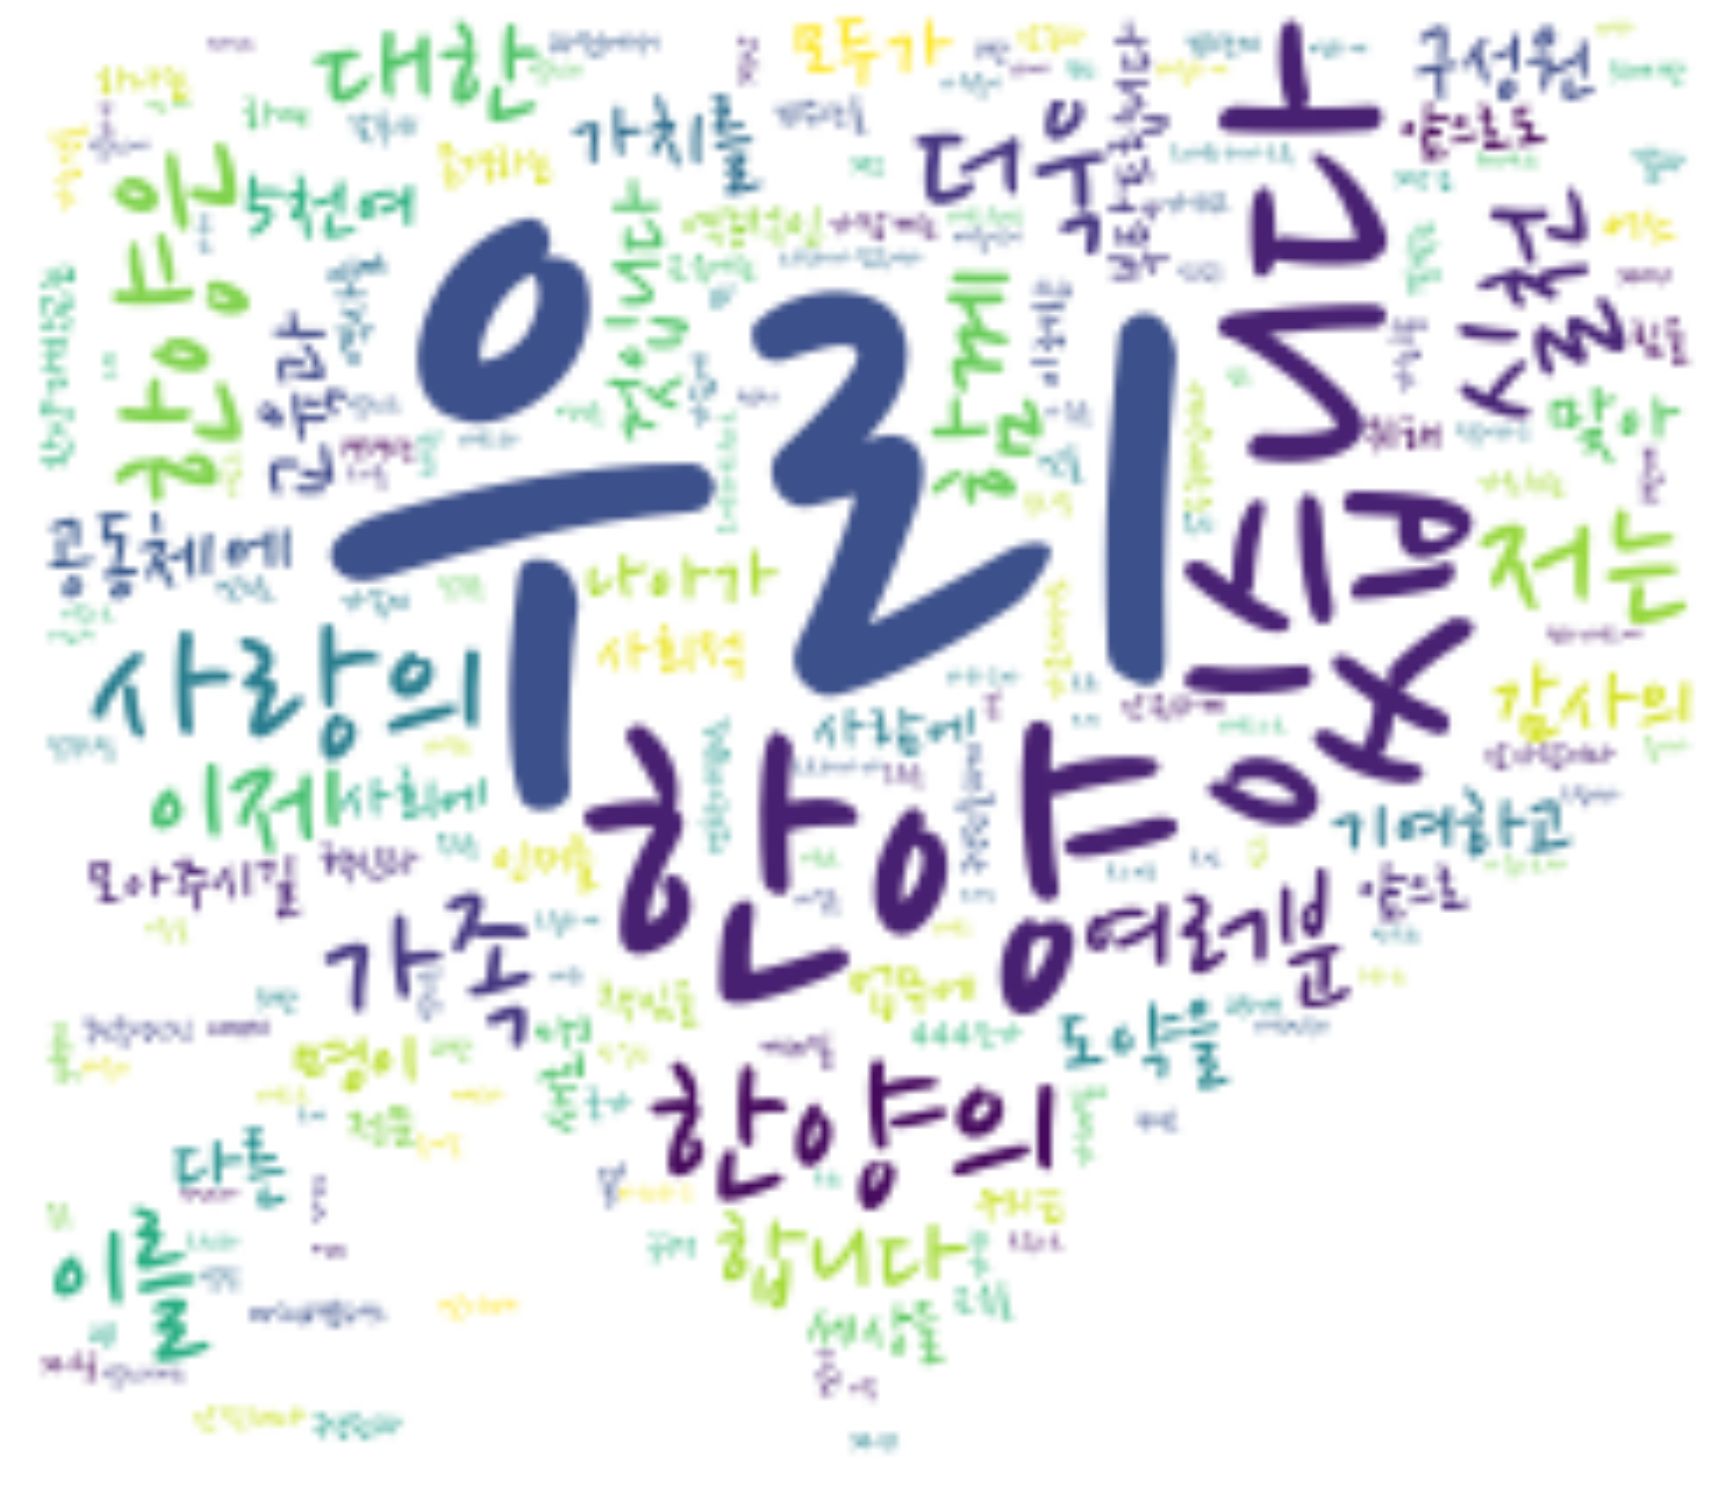

In [27]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("heart.png") # 그림파일로 추출하기

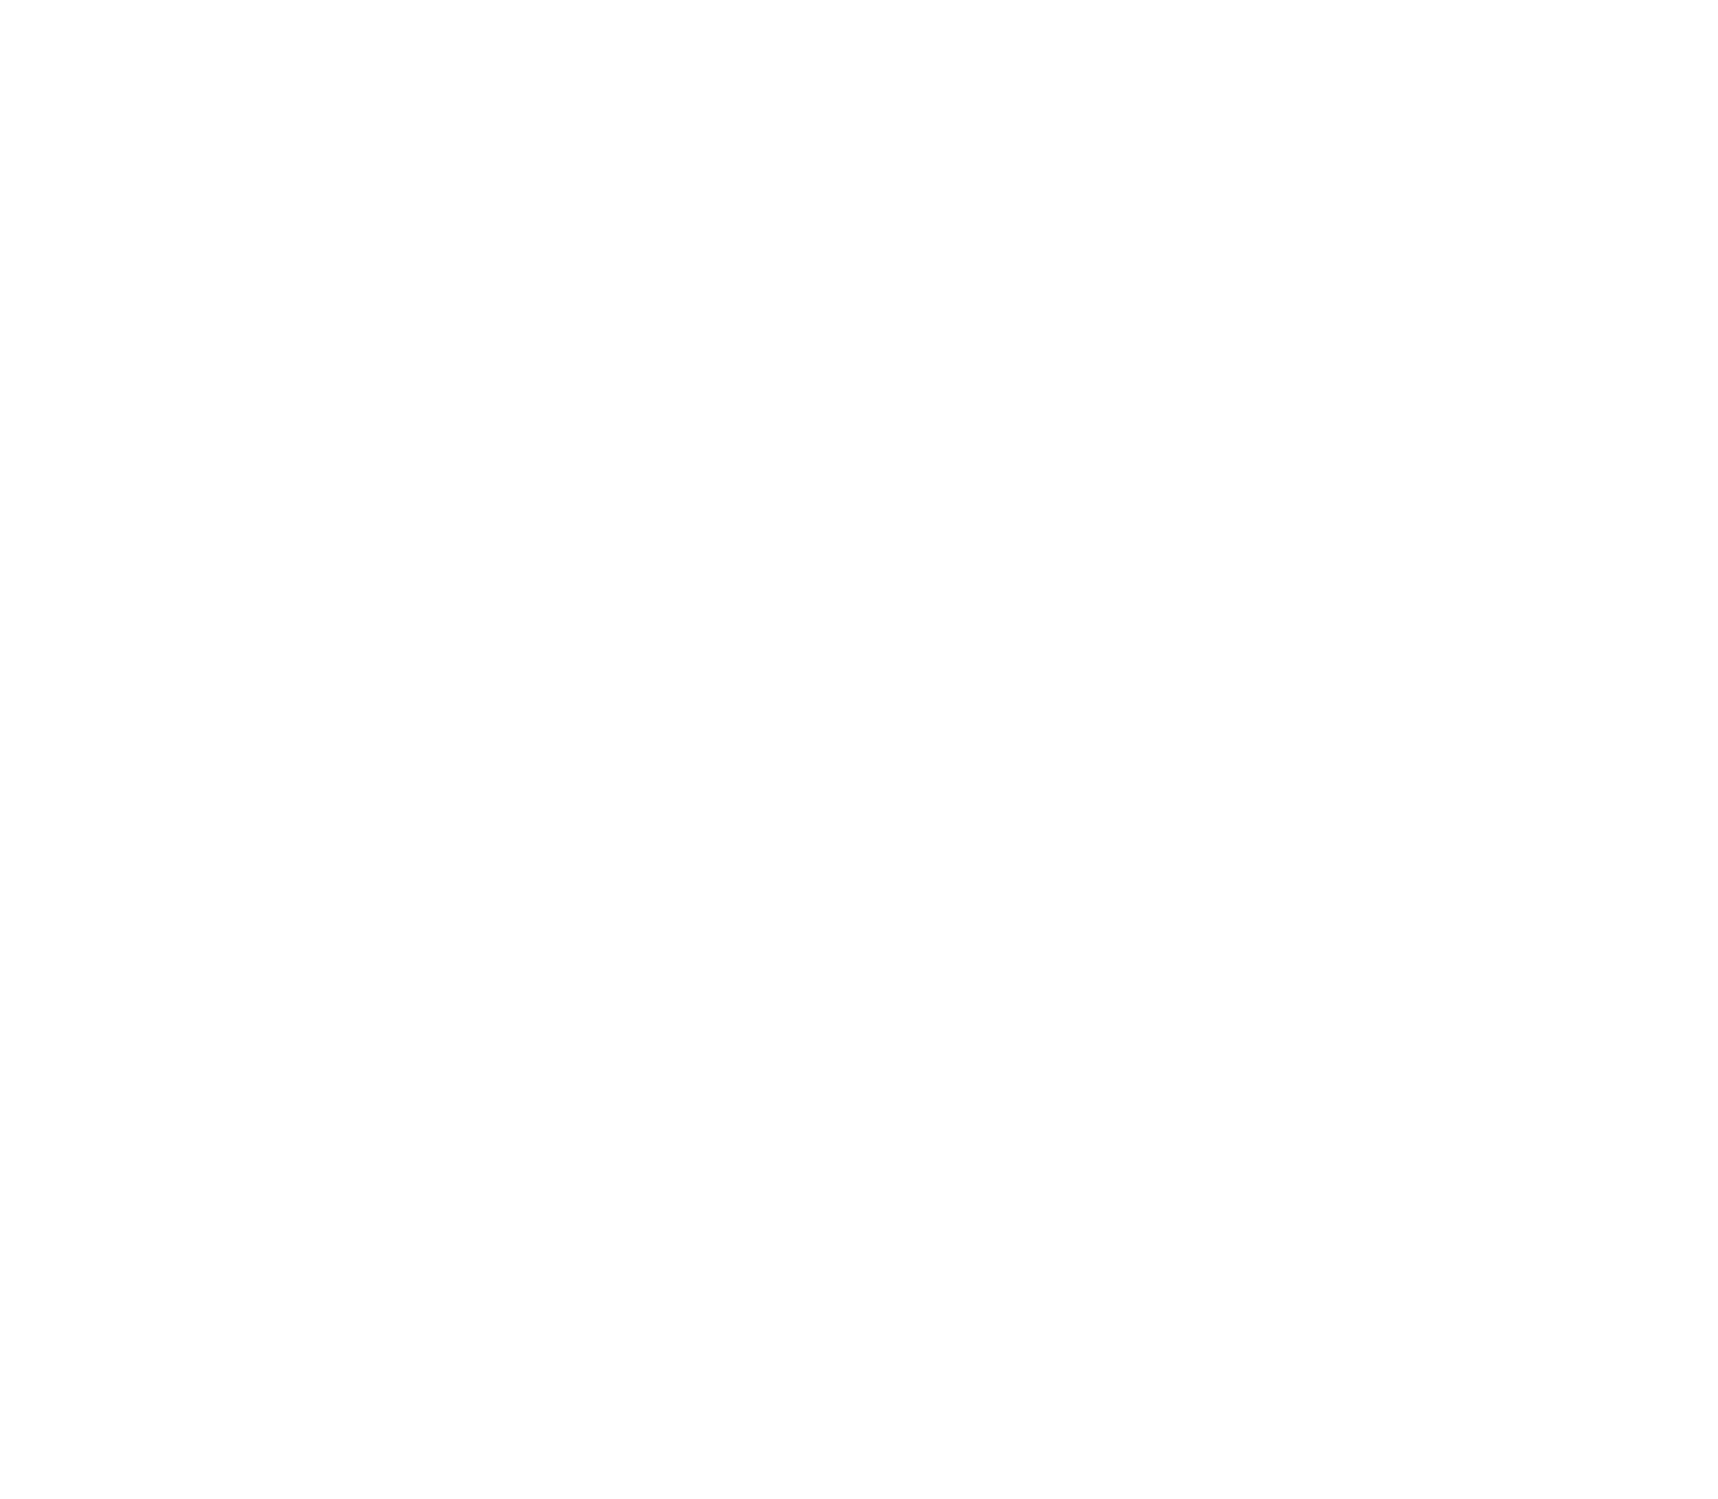

In [31]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("heart.png") # 그림파일로 추출하기